Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.912800014019
Validation accuracy for epoch 2 is: 0.926599979401
Validation accuracy for epoch 3 is: 0.934199988842
Validation accuracy for epoch 4 is: 0.94319999218
Validation accuracy for epoch 5 is: 0.944599986076
Validation accuracy for epoch 6 is: 0.952799975872
Validation accuracy for epoch 7 is: 0.951200008392
Validation accuracy for epoch 8 is: 0.950800001621
Validation accuracy for epoch 9 is: 0.957799971104
Validation accuracy for epoch 10 is: 0.955999970436


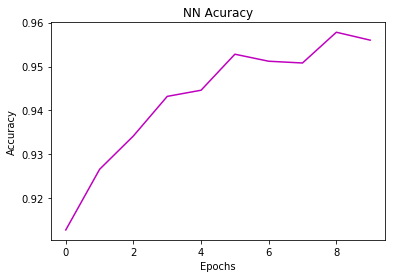

In [10]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
y_true = tf.placeholder(tf.float32, [None, 10])

# experiment with different architectures (amount of layers, size of layers, activation function, etc.)
hidden_size = 256
W1 = tf.Variable(tf.truncated_normal([n_input, hidden_size]))
b1 = tf.Variable(tf.truncated_normal([hidden_size]))
W2 = tf.Variable(tf.truncated_normal([hidden_size, n_output]))
b2 = tf.Variable(tf.truncated_normal([n_output]))
net_output = tf.nn.relu(tf.matmul(net_input, W1) + b1)  # try sigmoid, tanh, etc.
net_output = tf.nn.dropout(net_output, 0.9)  # try different dropout (this is the % to keep units)
net_output = (tf.matmul(net_output, W2) + b2)

correct_prediction = tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))

eta = 0.01  # try different values here [0.0001,...,0.1]

# you can experiment with different optimizers
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)
# optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
# optimizer = tf.train.RMSPropOptimizer(eta).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss = list()

batch_size = 100  # see how batch size influences the learning process
n_epochs = 10  # see how many epochs are needed to learn, when over-fitting occurs
for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)

plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()